### Fuel consumption prediction using Polynomial Linear Regression

##### Polynomial regression is used for better fit and prediction of values. The data is assumed to be near to linear in this case.

### Importing the libraries and the data set at first

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv('fuel.csv')
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


##### Now selecting some of the specific features from the dataset

In [3]:
data = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
data.head(3)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136


##### Then we will be creating the training and the testing data

In [4]:
mask = np.random.rand(len(data)) < 0.8
train = data[mask]
test = data[~mask]

In [12]:
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])

### Creating Polynomial Feature

In essence, we can call all of these, polynomial regression, where the relationship between the independent variable x and the dependent variable y is modeled as an nth degree polynomial in x. Lets say you want to have a polynomial regression (let's make 2 degree polynomial):

$$y = b + \theta\_1  x + \theta\_2 x^2$$

Now, the question is: how we can fit our data on this equation while we have only x values, such as **Engine Size**?
Well, we can create a few additional features: 1, $x$, and $x^2$.

**PolynomialFeatures()** function in Scikit-learn library, drives a new feature sets from the original feature set. That is, a matrix will be generated consisting of all polynomial combinations of the features with degree less than or equal to the specified degree. For example, lets say the original feature set has only one feature, *ENGINESIZE*. Now, if we select the degree of the polynomial to be 2, then it generates 3 features, degree=0, degree=1 and degree=2:

In [13]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [6]:
poly = PolynomialFeatures(degree=2)
train_x_poly = poly.fit_transform(train_x)
train_x_poly

array([[ 1.  ,  2.  ,  4.  ],
       [ 1.  ,  2.4 ,  5.76],
       [ 1.  ,  1.5 ,  2.25],
       ...,
       [ 1.  ,  3.2 , 10.24],
       [ 1.  ,  3.  ,  9.  ],
       [ 1.  ,  3.2 , 10.24]])

##### So, the above feature looks like multiple linear regression and thus we can use the linear regression model for prediction.

In [7]:
regr1 = LinearRegression()
regr1.fit(train_x_poly, train_y)
print ('Coefficients: ', regr1.coef_)
print ('Intercept: ', regr1.intercept_)

Coefficients:  [[ 0.         49.78121539 -1.40418081]]
Intercept:  [108.17335906]


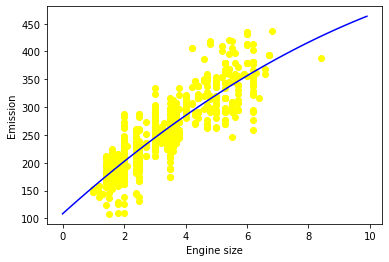

In [15]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='yellow')

#creating unknown arbitrary values to check the fit of the curve
XX = np.arange(0.0, 10.0, 0.1)
yy = regr1.intercept_[0]+ regr1.coef_[0][1]*XX+ regr1.coef_[0][2]*np.power(XX, 2)
plt.plot(XX, yy, '-b' )
plt.xlabel("Engine size")
plt.ylabel("Emission");

##### Now measuring the accuracy of the model 

In [26]:
from sklearn.metrics import r2_score

test_x_poly = poly.fit_transform(test_x)
predict_y = regr1.predict(test_x_poly)

print("Mean absolute error: %.2f" % np.mean(np.absolute(predict_y - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((predict_y - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y,predict_y ))

Mean absolute error: 22.73
Residual sum of squares (MSE): 902.47
R2-score: 0.78


The score indicates that the prediction is near to accurate. <br>

#### Now let's check for some other feature - let's take FUELCONSUMPTION_COMB

In [34]:
train_x = np.asanyarray(train[['FUELCONSUMPTION_COMB']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

test_x = np.asanyarray(test[['FUELCONSUMPTION_COMB']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])

poly2 = PolynomialFeatures(degree=3)
train_poly_x2 = poly2.fit_transform(train_x)
train_poly_x2

array([[1.000000e+00, 8.500000e+00, 7.225000e+01, 6.141250e+02],
       [1.000000e+00, 9.600000e+00, 9.216000e+01, 8.847360e+02],
       [1.000000e+00, 5.900000e+00, 3.481000e+01, 2.053790e+02],
       ...,
       [1.000000e+00, 1.150000e+01, 1.322500e+02, 1.520875e+03],
       [1.000000e+00, 1.180000e+01, 1.392400e+02, 1.643032e+03],
       [1.000000e+00, 1.130000e+01, 1.276900e+02, 1.442897e+03]])

In [35]:
regr2 = LinearRegression()
regr2.fit(train_poly_x2, train_y)

print ('Coefficients: ', regr2.coef_)
print ('Intercept: ', regr2.intercept_)

Coefficients:  [[ 0.00000000e+00  4.10523125e+01 -1.00087998e+00  3.13579203e-03]]
Intercept:  [-79.40283059]


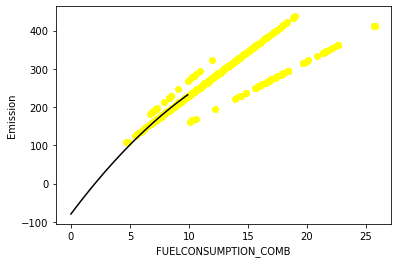

In [36]:
plt.scatter(train.FUELCONSUMPTION_COMB, train.CO2EMISSIONS,  color='yellow')
xx = np.arange(0.0, 10.0, 0.1)
yy = regr2.intercept_[0]+ regr2.coef_[0][1]*xx+ regr2.coef_[0][2]*np.power(xx, 2) + regr2.coef_[0][3]*np.power(xx, 3)
plt.plot(xx, yy, color='black' )
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission");

In [37]:
test_x_poly2 = poly2.fit_transform(test_x)
predict_y = regr2.predict(test_x_poly2)

print("Mean absolute error: %.2f" % np.mean(np.absolute(predict_y - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((predict_y - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y,predict_y ))

Mean absolute error: 12.81
Residual sum of squares (MSE): 556.62
R2-score: 0.86


R2 Score is even better with this feature.